In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Universities.csv to Universities.csv


In [3]:
Univ = pd.read_csv("Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
# Similar to the sklearn.preprocessing, MinMaxScaler function
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
# Similar to the sklearn.preprocessing, StandardScaler function
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [5]:
x=norm_func(Univ.iloc[:,1:])
x

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.401994,0.644235,-0.871888,0.068841,-0.324717,0.803729
1,1.370988,1.210256,-0.719814,-1.652182,2.508651,-0.631501
2,-0.059432,-0.745090,1.003685,-0.914600,-0.163745,-1.625123
3,0.401994,-0.024699,-0.770506,-0.177019,0.285756,0.141315
4,0.125139,0.335496,-0.314285,0.068841,-0.382949,0.362120
5,0.678850,0.644235,-0.821197,-0.668740,0.330956,0.914132
6,0.448137,0.695691,-0.466359,-0.177019,0.290956,0.914132
7,-0.105574,-0.127612,-0.770506,-0.177019,-0.503436,0.582924
8,1.232561,0.747148,-1.277417,-0.422880,0.841393,1.134936
9,0.355852,-0.076156,0.243318,-1.406321,2.170070,0.030913


In [6]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [7]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

# Elbow Chart

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[143.99999999999994, 61.57947259209859, 42.75049126219291, 33.404282405623434, 25.397040812580368, 21.511322369941464, 18.311297256353964, 15.774694571117053, 12.697674981382532, 10.584245976188209]


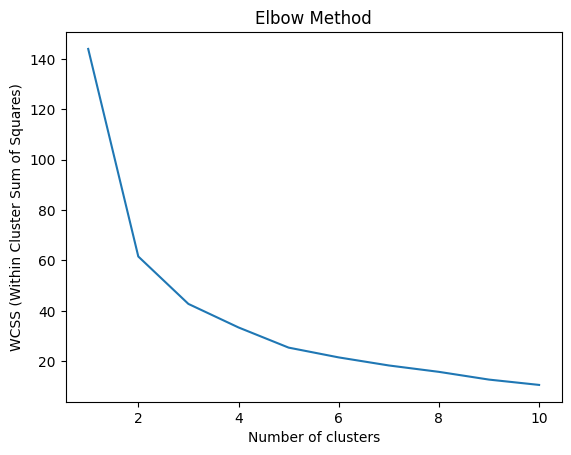

In [8]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [9]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
model = KMeans(4, random_state=0)
model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [10]:
model.labels_

array([3, 2, 1, 1, 1, 3, 3, 1, 3, 2, 3, 1, 1, 0, 3, 0, 3, 0, 1, 1, 0, 1,
       1, 0, 3], dtype=int32)

In [11]:
#Assign clusters to the data set
Univ['ClusterID'] = model.labels_
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,ClusterID
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [ ]:
#These are standardized values.
model.cluster_centers_

array([[-1.67257644, -1.67130589,  1.5410111 ,  1.44565884, -1.13218248,
        -1.36015706],
       [-0.00406055,  0.11937899, -0.00506912, -0.05408928, -0.26175602,
         0.05299313],
       [ 0.86342006,  0.56705021, -0.23824843, -1.52925136,  2.33936037,
        -0.30029442],
       [ 0.83458094,  0.75357989, -0.89723344, -0.45361234,  0.44996898,
         0.85893035]])

In [12]:
#Univ.groupby('clusterid_new').agg(['mean']).reset_index()
Univ.iloc[:,1:].groupby('ClusterID').agg(['mean'])
#Univ.groupby('clusterid_new').mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,mean,mean,mean,mean,mean,mean
ClusterID,,,,,,
0,1085.200,44.000,69.6,18.600,11056.40,74.4
1,1266.000,78.800,39.1,12.500,23612.20,87.2
2,1360.000,87.500,34.5,6.500,61133.00,84.0
3,1356.875,91.125,21.5,10.875,33878.75,94.5


In [ ]:
Univ['ClusterID'].value_counts()

,count
ClusterID,
1,10
3,8
0,5
2,2


In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,ClusterID
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [ ]:
Univ['ClusterID']=Univ['ClusterID'].replace(0, 'Cluster 1')
Univ['ClusterID']=Univ['ClusterID'].replace(1, 'Cluster 2')
Univ['ClusterID']=Univ['ClusterID'].replace(2, 'Cluster 3')
Univ['ClusterID']=Univ['ClusterID'].replace(3, 'Cluster 4')
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,ClusterID
0,Brown,1310,89,22,13,22704,94,Cluster 4
1,CalTech,1415,100,25,6,63575,81,Cluster 3
2,CMU,1260,62,59,9,25026,72,Cluster 2
3,Columbia,1310,76,24,12,31510,88,Cluster 2
4,Cornell,1280,83,33,13,21864,90,Cluster 2
5,Dartmouth,1340,89,23,10,32162,95,Cluster 4
6,Duke,1315,90,30,12,31585,95,Cluster 4
7,Georgetown,1255,74,24,12,20126,92,Cluster 2
8,Harvard,1400,91,14,11,39525,97,Cluster 4
9,JohnsHopkins,1305,75,44,7,58691,87,Cluster 3


In [ ]:
Univ['ClusterID'].value_counts()

,count
ClusterID,
Cluster 2,10
Cluster 4,8
Cluster 1,5
Cluster 3,2


In [ ]:
print(Univ[Univ['ClusterID']=='Cluster 1'])
print('\n')
print(Univ[Univ['ClusterID']=='Cluster 2'])
print('\n')
print(Univ[Univ['ClusterID']=='Cluster 3'])
print('\n')
print(Univ[Univ['ClusterID']=='Cluster 4'])

          Univ   SAT  Top10  Accept  SFRatio  Expenses  GradRate  ClusterID
13   PennState  1081     38      54       18     10185        80  Cluster 1
15      Purdue  1005     28      90       19      9066        69  Cluster 1
17    TexasA&M  1075     49      67       25      8704        67  Cluster 1
20   UMichigan  1180     65      68       16     15470        85  Cluster 1
23  UWisconsin  1085     40      69       15     11857        71  Cluster 1


            Univ   SAT  Top10  Accept  SFRatio  Expenses  GradRate  ClusterID
2            CMU  1260     62      59        9     25026        72  Cluster 2
3       Columbia  1310     76      24       12     31510        88  Cluster 2
4        Cornell  1280     83      33       13     21864        90  Cluster 2
7     Georgetown  1255     74      24       12     20126        92  Cluster 2
11  Northwestern  1260     85      39       11     28052        89  Cluster 2
12     NotreDame  1255     81      42       13     15122        94  Cluste

In [13]:
from sklearn import metrics
metrics.silhouette_score(x,model.labels_)

0.3244888750835694

In [14]:
!pip install plotly

In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [15]:
Univ = pd.read_csv("Universities.csv")
Univ[0:3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72


In [ ]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)
y=norm_func(Univ.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


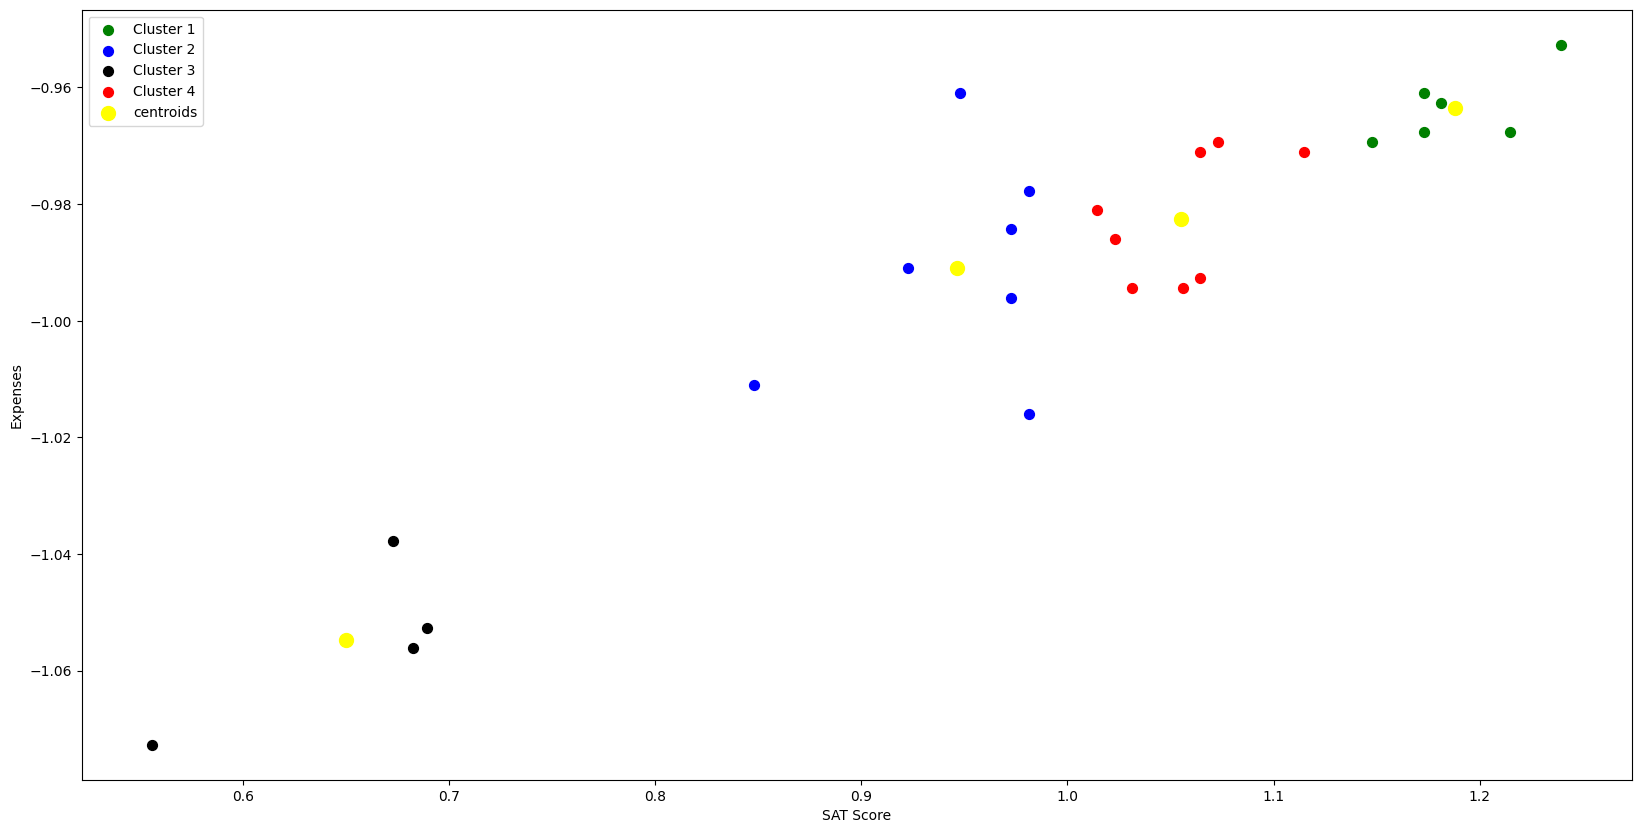

In [18]:
data = Univ[['SAT','Top10']].values
def norm_func(i):
    scaled = (i-i.mean())/(i.std())
    return (scaled)
x=norm_func(data)
#Build Cluster algorithm
from sklearn.cluster import KMeans
model = KMeans(4, random_state=0)
model.fit(x)
y_clusters = model.fit_predict(x)
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'green', label = "Cluster 1")
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'blue', label = "Cluster 2")
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'black', label = "Cluster 3")
plt.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],s = 50, c = 'red', label = "Cluster 4")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
plt.xlabel("SAT Score")
plt.ylabel("Expenses")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


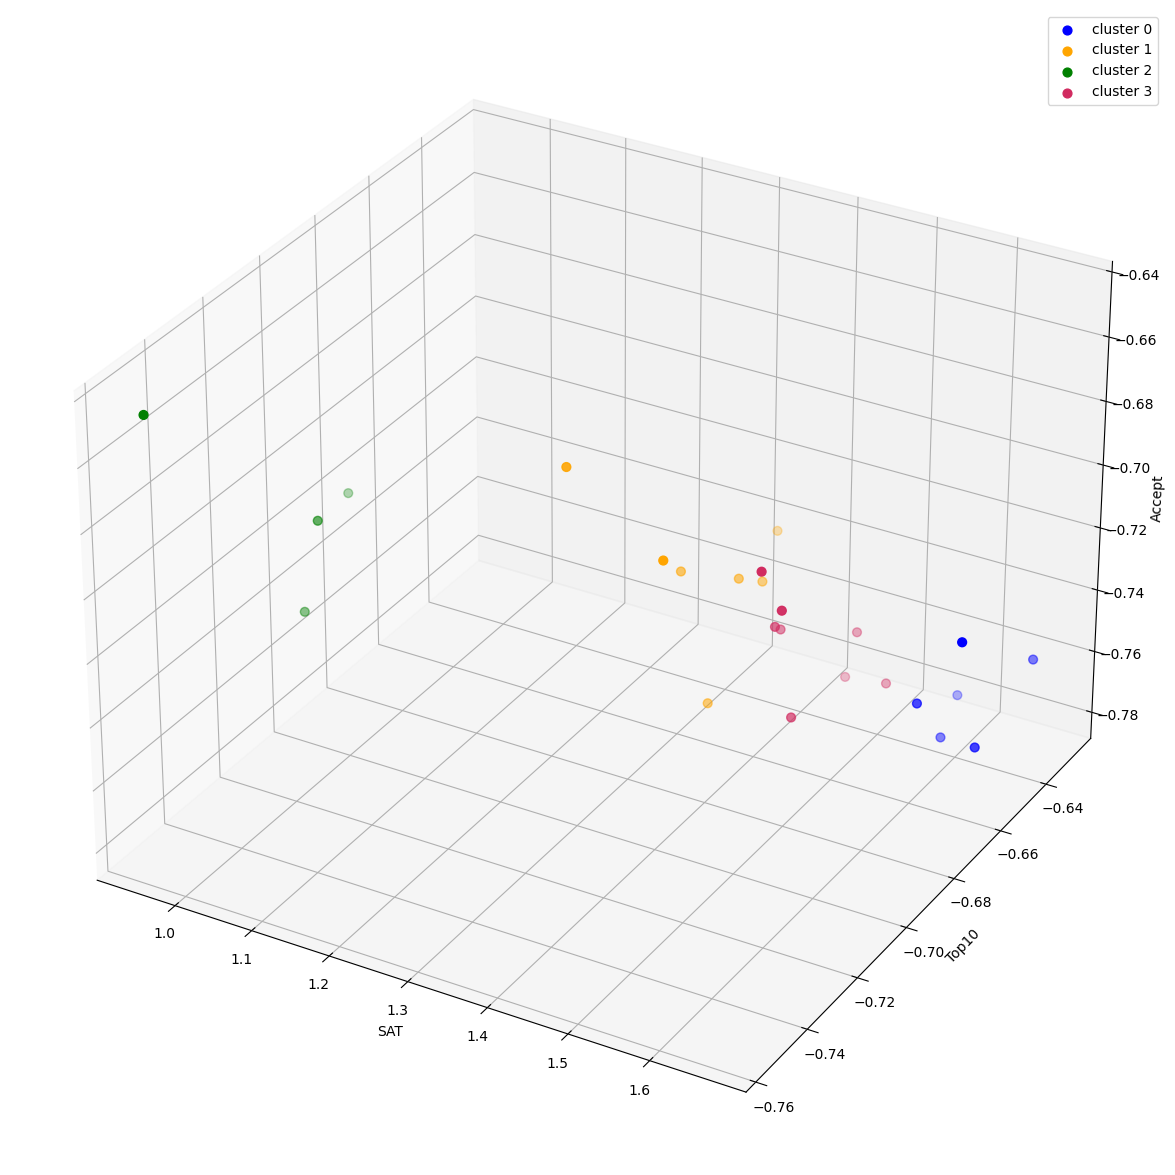

In [20]:
data = Univ[['SAT','Top10','Accept']].values
def norm_func(i):
    scaled = (i-i.mean())/(i.std())
    return (scaled)
x=norm_func(data)
#Build Cluster algorithm
from sklearn.cluster import KMeans
model = KMeans(4, random_state=0)
model.fit(x)
y_clusters = model.fit_predict(x)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.set_xlabel('SAT')
ax.set_ylabel('Top10')
ax.set_zlabel('Accept')
ax.legend()
plt.show()

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'SAT'),yaxis = dict(title  = 'Top10'),zaxis = dict(title  = 'Accept'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()